# Crowdfunding Education with DonorsChoose.org
## Part 1 (Does time of year affect project funding?)
#### Exploratory data analysis in Python

DonorsChoose.org is a website that promotes and facilitates the crowdfunding of classroom projects from schools around the country. Through DonorsChoose.org teachers and school administrators have received the critical funding they need to help them do everything from buying kits used for frog dissections in biology class to setting up bullying prevention programs. Since their inception in 2000, DonorsChoose.org has helped fully fund 1,208,707 school projects and have estimated to have helped 28,958,906 students. Their mission statement is as follows:

** "We make it easy for anyone to help a classroom in need, moving us closer to a nation where students in every community have the tools and experiences they need for a great education." **

In this series of kernesl we will be diving into the DonorsChoose data-set posted on Kaggle  to find out which projects members of the public find worthy of their donations. Although we will explore an assortment of different potential factors that might predict whether a project gets funded, this is not meant to be an exhaustive or comprehensive analysis of the data-set.

In the first part of this series of posts we will begin by testing the following hypothesis: 

***
** Hypothesis:**

*Posting a project at the beginning of the school year makes it more likely that your project gets fully funded.*

***

At first glance the stated hypothesis seems intuitive. For example, it seems reasonable that people looking for a good cause to donate to might be more likely to think of schools at the beginning of the school year, especially if they themselves are parents. Another possibility comes from the fact that DonorChoose.org often partners with companies and other organizations to set up match donation programs. These programs greatly improve the chances of projects reaching their funding goals. It seems likely that companies, looking to maximize good publicity of such partnerships, are more likely make arrangements with DonorsChoose.org at the beginning of the school year.

In [1]:
import scipy as sp
import scipy.io
from scipy import stats
import os
import numpy as np
import pandas as pd
import glob
import csv
from collections import Iterable
import matplotlib.pylab as plt
import matplotlib.patches as patch
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
plt.style.use('seaborn-white')
plt.close('all')
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rcParams['xtick.direction'] = 'out'
plt.rc('font', **font)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [27]:
# Load relevant DonorsChoose data
projects_df = pd.read_csv('Projects.csv')
donations_df = pd.read_csv('Donations.csv')
display(projects_df.info())
display(donations_df.info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110017 entries, 0 to 1110016
Data columns (total 18 columns):
Project ID                          1110017 non-null object
School ID                           1110017 non-null object
Teacher ID                          1110017 non-null object
Teacher Project Posted Sequence     1110017 non-null int64
Project Type                        1110017 non-null object
Project Title                       1110011 non-null object
Project Essay                       1110016 non-null object
Project Short Description           1110014 non-null object
Project Need Statement              1110014 non-null object
Project Subject Category Tree       1109988 non-null object
Project Subject Subcategory Tree    1109988 non-null object
Project Grade Level Category        1110017 non-null object
Project Resource Category           1109981 non-null object
Project Cost                        1110017 non-null float64
Project Posted Date                 1110017 non

None

<bound method DataFrame.info of                                Project ID                       Donation ID  \
0        000009891526c0ade7180f8423792063  688729120858666221208529ee3fc18e   
1        000009891526c0ade7180f8423792063  dcf1071da3aa3561f91ac689d1f73dee   
2        000009891526c0ade7180f8423792063  18a234b9d1e538c431761d521ea7799d   
3        000009891526c0ade7180f8423792063  38d2744bf9138b0b57ed581c76c0e2da   
4        000009891526c0ade7180f8423792063  5a032791e31167a70206bfb86fb60035   
5        000009891526c0ade7180f8423792063  8cea27f0cc03f41f66aab96b284ae6a1   
6        00000ce845c00cbf0686c992fc369df4  39af862cb04e4f938e5b827236a610a6   
7        00000ce845c00cbf0686c992fc369df4  c47f78571f62bcf10eee6a46a4a8a85d   
8        00000ce845c00cbf0686c992fc369df4  19351e1d9ae0bccab31b1f6009ad47a3   
9        00000ce845c00cbf0686c992fc369df4  d5364b1bb3b14594808bd6efa7544165   
10       00000ce845c00cbf0686c992fc369df4  84d4bd0c34c8c28f9e0121118c24360f   
11       00000ce845c

In [5]:
display(projects_df.head(3))
display(donations_df.head(2))

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22


,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23


### Subset data to only include projects that have been fully funded or expired
##### Projects expire 4 months after posting if not fully funded. Fill in these dates for expired projects

In [6]:
finished_projects_df = projects_df[projects_df['Project Current Status'].str.contains('Fully Funded|Expired')].copy()

###convert date columns to datetime
rel_date_cols = ['Project Posted Date', 'Project Fully Funded Date', 'Project Expiration Date']
finished_projects_df[rel_date_cols] = finished_projects_df[rel_date_cols].apply(pd.to_datetime)

#### a few 'Project Expiration Date' are empty - fill in with 'Project posted date' + 4 months
nulls = finished_projects_df['Project Expiration Date'].isnull()
finished_projects_df.loc[nulls, 'Project Expiration Date'] = (finished_projects_df.loc[nulls, 'Project Posted Date'] +
                                                              pd.DateOffset(months = 4))

### fill in 'project end date' for projects that expired with 'Project expiration date'
expired = finished_projects_df['Project Fully Funded Date'].isnull()
finished_projects_df.loc[expired, 'Project Fully Funded Date'] = finished_projects_df.loc[expired, 'Project Expiration Date']
finished_projects_df = finished_projects_df.rename(columns = {'Project Fully Funded Date':'Project End'})

### certain projects did not have a valid expiration date - fill those in with posting date + 4 months
nulls = finished_projects_df['Project End'].isnull()
finished_projects_df.loc[nulls, 'Project End'] = finished_projects_df.loc[nulls, 'Project Posted Date'] + pd.DateOffset(months = 4)
finished_projects_df['Days Open'] = ((finished_projects_df['Project End'] - finished_projects_df['Project Posted Date'])/
                                     np.timedelta64(1, 'D')).astype(int)

### remove projects that have expiration dates that precede posting date (data entry error?)
finished_projects_df = finished_projects_df[finished_projects_df['Days Open']>0]
finished_projects_df= finished_projects_df.reset_index(drop = True)


In [7]:
# finished_projects_df = finished_projects_df.sample(frac = 0.2, random_state=42) #subset for faster prototyping
# finished_projects_df= finished_projects_df.reset_index(drop = True)

To test to see if this hypothesis is correct we first looked at whether the number of projects that reach their funding goal varied in a consistent way across the school year. 

From the figure below it appears that there tends to be a surge in the number of projects that get funded at the start of the school year, this number then recedes significantly around the summer time. While this pattern seems to hold on a yearly basis, it is accompanied by a slow but steady increase year to year. A few prominent spikes in the number of projects funded are also evident. These spikes are due to large gifts or exceptionally generous donation match partnerships from the likes of Ripple and Bill and Melinda Gates.

In [8]:
## Group all finished projects (expired + fully funded) by week
finished_projects_df['Project End'] = pd.to_datetime(finished_projects_df['Project End'])
all_fin_proj_posted_grouped = finished_projects_df.groupby(pd.Grouper(key = 'Project Posted Date', freq = 'W'))

## Group all fully funded project by week of fully funded date
ff_proj_completed_df = finished_projects_df[finished_projects_df['Project Current Status'] == 'Fully Funded']
ff_proj_completed_grouped = ff_proj_completed_df.groupby(pd.Grouper(key = 'Project End', freq = 'W'))

## Group all fully funded project by week of posted date
ff_proj_posted_df = finished_projects_df[finished_projects_df['Project Current Status'] == 'Fully Funded']
ff_proj_posted_grouped = ff_proj_posted_df.groupby(pd.Grouper(key = 'Project Posted Date', freq = 'W'))

## Group all expired projects by week of posted date
exp_proj_df = finished_projects_df[finished_projects_df['Project Current Status'] == 'Expired']
exp_proj_posted_grouped = exp_proj_df.groupby(pd.Grouper(key = 'Project Posted Date', freq = 'W'))

In [9]:
## Find start and end of each school year
weeks = pd.Series(ff_proj_completed_grouped.groups).reset_index()
school_start_inds = weeks['index'].apply(lambda x: x.week == 35)
school_end_inds = weeks['index'].apply(lambda x: x.week == 22)

school_start_inds.iloc[0] = True
school_end_inds.iloc[-1] = True

school_year = list(zip(weeks.loc[school_start_inds, 'index'], weeks.loc[school_end_inds, 'index']))
school_year

[(Timestamp('2013-01-06 00:00:00'), Timestamp('2013-06-02 00:00:00')),
 (Timestamp('2013-09-01 00:00:00'), Timestamp('2014-06-01 00:00:00')),
 (Timestamp('2014-08-31 00:00:00'), Timestamp('2015-05-31 00:00:00')),
 (Timestamp('2015-08-30 00:00:00'), Timestamp('2016-06-05 00:00:00')),
 (Timestamp('2016-09-04 00:00:00'), Timestamp('2017-06-04 00:00:00')),
 (Timestamp('2017-09-03 00:00:00'), Timestamp('2018-05-13 00:00:00'))]

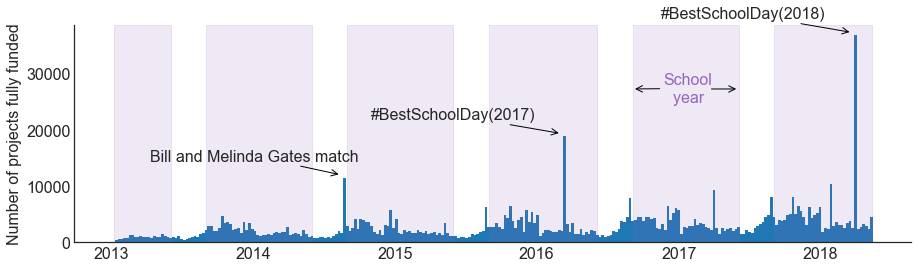

In [15]:
## count the number projects funded each week
weekly_funded = ff_proj_completed_grouped.size()

## plot
fig,ax = plt.subplots(1,1, figsize = (15,4), sharex = True)
ax.bar(weekly_funded.index, weekly_funded, 7)

# plot patches to denote school years
ymax = ax.get_ylim()[1]
for start, stop in school_year:
    ax.add_patch(patch.Rectangle((mdates.date2num(start),0), 
                                 mdates.date2num(stop)-mdates.date2num(start), ymax, color = 'C4', alpha = 0.15))

## find outlier weeks where a large number of projects were funded
spikes = weekly_funded.nlargest(3)

## annotate outliers and school years
annotations = ['#BestSchoolDay(2018)', '#BestSchoolDay(2017)','Bill and Melinda Gates match']
for text, (spike_ind, spike) in zip(annotations, spikes.items()):
    ax.annotate(text, xy=(mdates.date2num(spike_ind)-10, 
                spike+500), xytext=(mdates.date2num(spike_ind)-500,spike+3000), arrowprops = {'arrowstyle': '->'})
    
ax.annotate('School\n  year', xy=(mdates.date2num(school_year[4][0])+1, 
                27250), xytext=(mdates.date2num(school_year[4][0])+80,25000), arrowprops = {'arrowstyle': '->'}, color = 'C4')
ax.annotate('', xy=(mdates.date2num(school_year[4][1])-1, 
                27250), xytext=(mdates.date2num(school_year[4][1])-75,27250), arrowprops = {'arrowstyle': '->'}, color = 'C4')

#clean up plot and label axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Number of projects fully funded')
xrange = ax.get_xlim()

fig.savefig('Funded_proj_timeline.png', format = 'PNG')

The above pattern may be a good sign that posting a project at the beginning of the school year would increase the chances of it getting funded, however this may not be the case. While the total number of projects funded does increase, this could be accompanied by an increase in the number of projects being posted. If this were true, then the fraction of projects being funded in late August and early September may be similar or in fact lower than the fraction being funded at the end of the school year.
To get a better idea of whether this is the case we looked to see whether the number of projects posted and the number of total active/live projects also varied across the school year. The figure below shows that indeed more projects are posted at the beginning of the school year which in turn leads to an increase in the number of live projects. This is also shown by the fact that the rate of funding projects and the rate of posting projects show a small but significant correlation ( r-squared= 0.22,  p<0.001).

In [16]:
## list the days where each project was active
ranges = finished_projects_df[['Project Posted Date','Project End']].applymap(lambda x: int(x.timestamp()))
ranges = ranges.apply(lambda x: range(x[0], x[1], 86400), axis = 1) #86400 is number of seconds in a day
ranges = np.concatenate(ranges.apply(list).values)

## bin and count how many projects were active during each day
active_hist, xvals = np.histogram(ranges, bins = np.arange(ranges.min(), ranges.max()+1, 86400))
to_time_vec = np.vectorize(datetime.utcfromtimestamp)
xvals = to_time_vec(xvals[:-1])

active_proj = pd.DataFrame({'date':xvals, 'Active Projects':active_hist})

In [17]:
## calculate how many projects were funded each day
daily_fund_rate = ff_proj_completed_df.groupby(pd.Grouper(key = 'Project End', freq = 'D')).size()
daily_fund_rate = daily_fund_rate.reset_index()
daily_fund_rate['Project End'] = pd.to_datetime(daily_fund_rate['Project End'])
daily_fund_rate = daily_fund_rate.rename(columns={0: 'Number funded'})

# ## calculate fraction of active projects funded each day 
# active_proj = active_proj.merge(daily_fund_rate, left_on = 'date', 
#                                 right_on = 'Project End', how = 'inner').drop('Project End', axis = 1)
# active_proj['frac_funded'] = active_proj.apply(lambda x: x[2]/x[1], axis = 1)

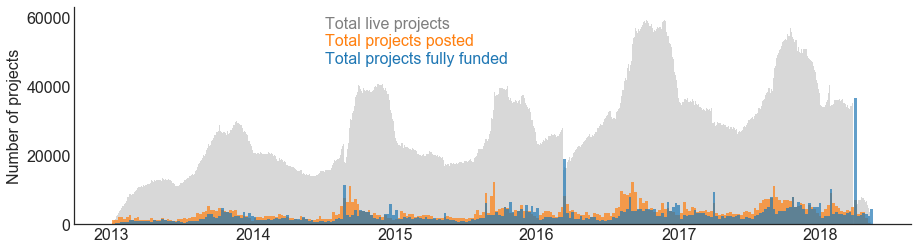

In [18]:
## count number of projects that were posted each week
weekly_posted_all = all_fin_proj_posted_grouped.size()

## plot
fig,ax = plt.subplots(1,1, figsize = (15,4), sharex = True)
ax.bar(xvals, active_hist, 1, alpha = 0.3, color = 'C7')
ax.bar(weekly_posted_all.index, weekly_posted_all, 7, color = 'C1', alpha = 0.7)
ax.bar(weekly_funded.index, weekly_funded, 7, color = 'C0', alpha = 0.7)

## label things
ax.text(0.3, 0.9, 'Total live projects', color = 'C7', transform=ax.transAxes)
ax.text(0.3, 0.82, 'Total projects posted', color = 'C1', transform=ax.transAxes)
ax.text(0.3, 0.74, 'Total projects fully funded', color = 'C0', transform=ax.transAxes)

## clean up figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(xrange)
ax.set_ylabel('Number of projects')

fig.savefig('Stacked_proj_timeline.png', format = 'PNG')

r2:0.2221085751097142
p: 7.834535024292686e-17


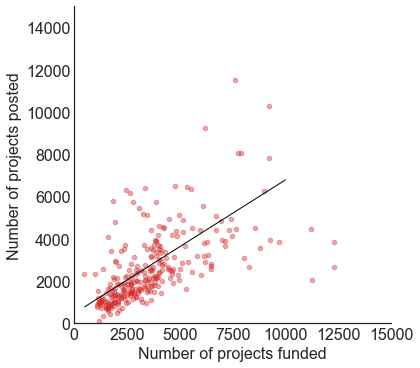

In [19]:
from numpy.polynomial.polynomial import polyfit

fig,ax = plt.subplots(1,1, figsize = (6,6))

## plot each week based on number of projects posted vs funded
ax.scatter(weekly_posted_all, weekly_funded.iloc[:-1], alpha = 0.4, s = 20,color = 'C3')

## calculate best fit line and plot
m, b, r_value, p_value, std_err = scipy.stats.linregress(weekly_posted_all, weekly_funded.iloc[:-1])
ax.plot(np.array([500,10000]), np.array([500,10000]) * m + b, 'k', linewidth = 1)
text

## clean up figure and label things
ax.set_ylabel('Number of projects posted')
ax.set_xlabel('Number of projects funded')
plt.xlim(0, 15000)
plt.ylim(0, 15000)
plt.gca().set_aspect('equal', adjustable='box')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('correlation_posted_funded.png', format = 'png')

print('r2:' + str(r_value**2))
print('p: ' + str(p_value))

If the increase in project funding is entirely counterbalanced by an increase in the number of projects posted then the fraction of projects that are funded at the start of the year should not be significantly different from the fraction that are ultimately funded at any other point in the school year. To test this we sorted projects into those that were ultimately fully funded and those that expired before reaching their funding goal. The figure below shows that at the beginning of the school year, the number of projects posted that expired increased at what seems like a similar rate as those that were eventually funded.

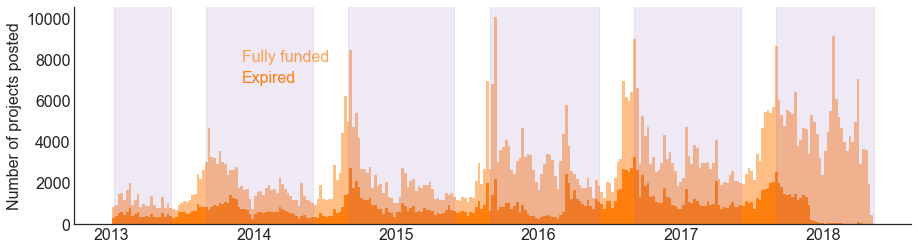

In [20]:
#count number of projects posted that either were eventually funded or expired
weekly_posted_exp = exp_proj_posted_grouped.size()
weekly_posted = ff_proj_posted_grouped.size()

# plot
fig,ax = plt.subplots(1,1, figsize = (15,4), sharex = True)
ax.bar(weekly_posted.index, weekly_posted, 7, color = 'C1', alpha = 0.5)
ax.bar(weekly_posted_exp.index, weekly_posted_exp, 7, color = 'C1')

# label things
for start, stop in school_year:
    ax.add_patch(patch.Rectangle((mdates.date2num(start),0), 
                                 mdates.date2num(stop)-mdates.date2num(start), ymax, color = 'C4', alpha = 0.15))
ax.set_ylabel('Number of projects posted')
ax.text(0.2, 0.75, 'Fully funded', color = 'C1', transform=ax.transAxes, alpha = 0.7)
ax.text(0.2, 0.65, 'Expired', color = 'C1', transform=ax.transAxes)

# clean up figure
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.savefig('Posted_proj_timeline_exp.png', format = 'PNG')

We next calculated the average fraction of projects that were funded for each week throughout the year. We then tested to see if the fraction of funded projects posted in late August/early September was significantly higher than the fraction of funded projects posted after the start of the school year (October/early November) or during the end of the school year (late April/May)

We found that the fraction of projects posted early in the school year that were eventually funded was significantly greater than that for projects posted at end of the school year (p<0.5 ) and showed a relatively large effect size (d = 0.81). However, the fraction of funded projects posted in the middle of the school year did not differ significantly from those that were posted at the start of the school year.

In [21]:
## caclulate the fraction of projects that are posted each week that ultimately get funded
frac_ffunded_by_post_day = weekly_posted/weekly_posted_all
frac_ffunded_by_post_day = frac_ffunded_by_post_day.reset_index()

## exclude any projects that are posted at during the last school year since it is incomplete
frac_ffunded_by_post_day = frac_ffunded_by_post_day[frac_ffunded_by_post_day['Project Posted Date'] < school_year[-1][0]]

## group projects by week across the years to calculate means ect.
frac_ffunded_by_post_day['week'] = frac_ffunded_by_post_day['Project Posted Date'].apply(lambda x: x.week)
frac_ffunded_by_post_day = frac_ffunded_by_post_day.rename(columns = {0:'Fraction funded'})
frac_ffunded_by_post_day = frac_ffunded_by_post_day[frac_ffunded_by_post_day['week']<53]

## calc means and sem for the fraction of funded projects
mean_frac_funded_by_post_day = frac_ffunded_by_post_day.groupby('week').mean().reset_index()
sem_frac_funded_by_post_day = frac_ffunded_by_post_day.groupby('week')['Fraction funded'].apply(stats.sem).reset_index()

In [22]:
## reorder weeks to fit the academic year
order = np.concatenate([np.where(mean_frac_funded_by_post_day['week']>21)[0], 
                        np.where(mean_frac_funded_by_post_day['week']<22)[0]])

mean_frac_funded_by_post_day = mean_frac_funded_by_post_day.iloc[order].reset_index(drop=True)
sem_frac_funded_by_post_day = sem_frac_funded_by_post_day.iloc[order].reset_index(drop = True)
order

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20], dtype=int64)

In [23]:
## transform week representation from int to month
mean_frac_funded_by_post_day['week'] = mean_frac_funded_by_post_day['week'].apply(lambda x: datetime.strptime(str(x)+'-0', '%W-%w'))
mean_frac_funded_by_post_day['week'] = mean_frac_funded_by_post_day['week'].apply(lambda x: datetime.strftime(x, '%B'))

In [24]:
## Need to repeat the above but want to group number funded and total number of projects by week before calculating fraction
## want to do this in order to calculate fraction funded during four week periods that we will compare statistically with 
## other four week periods

funded_proj_week = pd.concat([weekly_posted.to_frame(name = 'funded'), weekly_posted_all.to_frame(name = 'total')], axis = 1)
funded_proj_week = funded_proj_week.reset_index()
funded_proj_week['week'] = funded_proj_week['Project Posted Date'].dt.week
funded_proj_week['year'] = funded_proj_week['Project Posted Date'].dt.year
funded_proj_week = funded_proj_week[funded_proj_week['year']<2018]
funded_proj_week = funded_proj_week.groupby('year')

def calc_epoch_ff(week_range, grouped):
    frac_ff = funded_proj_week.apply(lambda x: np.sum(x.loc[(x['week']>week_range[0]) &
                                                            (x['week']<=week_range[1]), ['funded', 'total']], axis = 0))
    frac_ff = (frac_ff['funded']/frac_ff['total']).dropna()
    return frac_ff

## calculate the fraction of projects funded for three planned comparisons
early_frac_ff = calc_epoch_ff([32,36], funded_proj_week)
late_frac_ff = calc_epoch_ff([13,17], funded_proj_week)
middle_frac_ff = calc_epoch_ff([39,43], funded_proj_week)

In [25]:
display(pd.DataFrame([early_frac_ff, late_frac_ff,middle_frac_ff], index = ['start', 'end', 'middle']))

## calculate if means are significantly different for the different epochs
start_end_test = stats.mannwhitneyu(early_frac_ff,late_frac_ff)
start_middle_test = stats.mannwhitneyu(early_frac_ff,middle_frac_ff)

## calculate effect size
def cliffs_d(stat,x1,x2):
    return (2*stat/(len(x1)*len(x2)))-1
    
print('start vs end pvalue: ' + str(start_end_test.pvalue))
print('start vs middle pvalue: ' + str(start_middle_test.pvalue))

print('start vs end effect size: ' + str(cliffs_d(start_end_test.statistic, early_frac_ff,late_frac_ff)))
print('start vs middle effect size: ' + str(cliffs_d(start_middle_test.statistic, early_frac_ff,middle_frac_ff)))


year,2013,2014,2015,2016,2017
start,0.794831,0.787101,0.791830,0.715144,0.749847
end,0.714963,0.731505,0.715364,0.643224,0.709725
middle,0.742330,0.683390,0.797178,0.700036,0.794805


start vs end pvalue: 0.01835692818135205
start vs middle pvalue: 0.33805165701157347
start vs end effect size: -0.84
start vs middle effect size: -0.19999999999999996


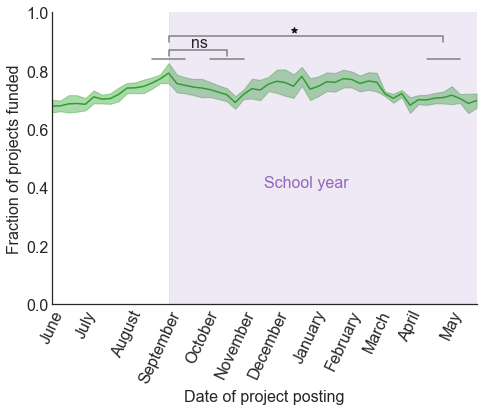

In [26]:
fig, ax = plt.subplots(1,1, figsize = (7,6))

## plot fraction funded by week
ax.plot(np.arange(0,52), mean_frac_funded_by_post_day['Fraction funded'], color = 'C2')
ax.fill_between(np.arange(0,52),
                mean_frac_funded_by_post_day['Fraction funded'] -sem_frac_funded_by_post_day['Fraction funded'],
                mean_frac_funded_by_post_day['Fraction funded'] +sem_frac_funded_by_post_day['Fraction funded'], alpha =0.4,color = 'C2')

## label epochs that we compared
week_order = order +1
start = np.where(order == 33)[0]
end = np.where(order == 14)[0]
middle = np.where(order == 40)[0]

ax.plot([start,start,start+4,start+4], [0.84,0.84,0.84,0.84], 'C7')
ax.plot([end,end,end+4,end+4], [0.84,0.84,0.84,0.84], 'C7')
ax.plot([middle,middle,middle+4,middle+4], [0.84,0.84,0.84,0.84],'C7')
ax.plot([(start+start+4)/2,(start+start+4)/2, (end+end+4)/2,(end+end+4)/2], [0.9,0.92,0.92,0.9], 'C7')
ax.plot([(middle+middle+4)/2,(middle+middle+4)/2, (start+start+4)/2,(start+start+4)/2], [0.85,0.87,0.87,0.85], 'C7')
ax.scatter((end+start+4)/2.1, .94, color = 'k', marker = '*')
ax.text((middle+start+4)/2.1, .88, 'ns')

## label academic year
ax.add_patch(patch.Rectangle((14,0), 37, ymax, color = 'C4', alpha = 0.15))

## clean up figure
xticks = np.sort(np.unique(mean_frac_funded_by_post_day['week'].values, return_index = True)[1])
ax.set_xticks(xticks)
ax.set_xticklabels(mean_frac_funded_by_post_day['week'].values[xticks], rotation = 65)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1); ax.set_xlim(0,51)
ax.set_ylabel('Fraction of projects funded')
ax.set_xlabel('Date of project posting')
ax.text(0.5, 0.4, 'School year', transform = ax.transAxes, color = 'C4')
fig.tight_layout()
fig.savefig('fraction of projects funded')


## TL;DR:

The bottom line:
There is a yearly pattern to how many projects get funded throughout the year. More projects get funded at the start of the school year. However, for the most part this is well balanced by an increase in projects being posted. As a result projects are as likely to get funded in the middle of the school year than at the start. The only significant effect is for projects posted at the end of the year and probably during the early summer. These are less likely to get funded than if they were posted at the start of the year.
One practical implication of the above findings are that if you want to post projects at the end of the year to say, fund a summer project, you may want to account for the decreased likelihood of your project being funded. For example, you may want to decrease your funding goal (see upcoming part 2 of this project).